# **Contentious Debate in Higher Education Surrounding Political Correctness: A Multi-Perspective Study**


# Table of Contents
 - [Research Goal and Motivation](#item-one)
 - [Data Cleaning and Preparation](#item-two)
 - [Cleaning Categorical Data](#item-three)
 - [Calculating Measures](#item-four)
 - [Method](#item-five)
 - [Procedure](#item-six)
 - [Data Visualizations](#item-seven)
 - [Independent Samples t-Test](#item-eight)
 - [References](#item-nine)
 

<a id="item-one"></a>
# Research Goal and Motivation

In Western circles, political correctness (PC) has become a hot topic of debate among both students and scholars. Some believe their right to free speech and upholding the integrity of scientific excellence is at stake, while others believe PC is necessary to minimize social inequity and change negative biases towards marginalized groups. To better understand how political correctness has influenced people’s attitudes, this study investigates the association between concern for political correctness (CPC), tolerance of ambiguity (TOA), and concept creep (CC), and how demographic variables could moderate this relationship.

In [41]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

<a id="item-two"></a>
# Data Cleaning and Preparation
First, we will start with cleaning and prepping our data for analysis. We will drop columns and change numerical values that represent categorical data to strings. We will also calculate participants the mean scores for each measure and add that to the existing data frame.

In [2]:
#Read in dataset
df = pd.read_excel('/kaggle/input/political-correctness-research/PC_Research.xlsx')

#List column names
list(df.columns)

['TOA1',
 'TOA2',
 'TOA3',
 'TOA4',
 'TOA5',
 'TOA6',
 'TOA7',
 'TOA8',
 'TOA9',
 'TOA10',
 'TOA11',
 'TOA12',
 'CPC1',
 'CPC2',
 'CPC3',
 'CPC4',
 'CPC5',
 'CPC6',
 'CPC7',
 'CPC8',
 'CPC9',
 'CCMD2',
 'CCMD3',
 'CCMD4',
 'CCMD5',
 'CCMD6',
 'CCMD7',
 'CCMD8',
 'CCMD9',
 'CCMD10',
 'CCMD11',
 'CCP1',
 'CCP2',
 'CCP3',
 'CCP4',
 'CCP5',
 'CCP6',
 'CCP7',
 'CCP8',
 'CCP9',
 'CCP10',
 'CCT1',
 'CCT2',
 'CCT3',
 'CCT4',
 'CCT5',
 'CCT6',
 'CCT7',
 'CCT8',
 'CCT9',
 'CCT10',
 'CCB2',
 'CCB3',
 'CCB4',
 'CCB5',
 'CCB6',
 'CCB7',
 'CCB8',
 'CCB9',
 'CCB10',
 'Demographics1',
 'Demographics1_6_TEXT',
 'Demographics2',
 'Demographics3',
 'Demographics3_7_TEXT',
 'Demographics4',
 'Q87',
 'Q87_6_TEXT',
 'Demographics5',
 'Demographics5_4_TEXT',
 'Demographics6',
 'Demographics7',
 'Demographics8',
 'TOA_Scale',
 'CPC_Scale',
 'CCT_Scale',
 'CCB_Scale',
 'CCMD_Scale',
 'CCP_Scale',
 'Race_12',
 'Gender_Idenity_12',
 'Sexual_Orientiation_12']

In [3]:
#Read in dataset
df = pd.read_excel('/kaggle/input/political-correctness-research/PC_Research.xlsx')

# list of columns to drop
col_list = ['Demographics1','Demographics1_6_TEXT','Demographics2','Demographics3','Demographics3_7_TEXT','Demographics4',
 'Q87','Q87_6_TEXT','Demographics5','Demographics5_4_TEXT','Demographics6','Demographics7','Demographics8','TOA_Scale',
 'CPC_Scale','CCT_Scale','CCB_Scale','CCMD_Scale','CCP_Scale',]  

#Drop columns
df = df.drop(columns=col_list)

<a id="item-three"></a>
# Cleaning Categorical Data
Here we are changing 1's and 2's to represent categorical data. Because this is a small preliminary sample size, we are grouping different identities into larger umbrella groups. (e.g. Those who identify as Black, Asian, LatinX are categorized as BIPOC). 

In [4]:
def clean_column(df, column_name, replace_dict):
    # Replace the values and handle nulls
    df[column_name] = df[column_name].replace(replace_dict)
    
    # Convert to category (optional)
    df[column_name] = df[column_name].astype('category')

# Dictionary of columns and their replacement mappings
columns_to_clean = {
    'Race_12': {1: 'White', 2: 'BIPOC', np.nan: 'Unknown'},
    'Gender_Idenity_12': {1: 'Female', 2: 'Male', np.nan: 'Unknown'},
    'Sexual_Orientiation_12': {1: 'Straight', 2: 'LGBTQIA', np.nan: 'Unknown'}
}

# Apply the cleaning function to each column
for column, replace_dict in columns_to_clean.items():
    clean_column(df, column, replace_dict)

<a id="item-four"></a>
## Calculating Measures
To understand participants attitudes, we are calculating mean scores of each measure for every participant. Here we sum all the items that belong to a measure and dividing by the number of items in that same measure. First, we will make a function that can be used to calculate each participants score on each measure.

The `measure_calculation` function takes three parameters. The first parameter `measure_items` it takes is a data frame. The second parameter's intention is to take a list of item numbers from a measure. Then the third parameter `measure_name` is to take string input which will be what the new measure calculation's function will assign names to new columns.


In [5]:
def measure_calculation(df, measure_items, measure_name):
    # Naming for sum and new measure
    measure_sum = f'{measure_name}_sum'
    new_measure = f'{measure_name}_scale'
    
    # Sum item measures
    df[measure_sum] = df[measure_items].sum(axis=1)
    
    # Get length of items
    measures_len = len(measure_items)
    
    # New measure = sum / number of items
    df[new_measure] = df[measure_sum] / measures_len


In the next code chunk, we create lists containing eaach measure's items and then call the function `measure_calculation` to calculate each measure. Then we drop the sum columns for the measures as we no longer need these columns going forward in our data analysis.

In [6]:
#Tolerance of Ambiguity Scale
toa_col = ['TOA1','TOA2','TOA3','TOA4','TOA5','TOA6','TOA7','TOA8','TOA9','TOA10','TOA11','TOA12']
measure_calculation(df,toa_col,'toa')

#Concern for Political Correctness Scale
cpc_col = ['CPC1','CPC2','CPC3','CPC4','CPC5','CPC6','CPC7','CPC8','CPC9']
measure_calculation(df,cpc_col,'cpc')

# Concept Creep Trauma Scale
cpt_col = ['CCT1','CCT2','CCT3','CCT4','CCT5','CCT6','CCT7','CCT8','CCT9','CCT10']
measure_calculation(df,cpt_col,'cpt')

# Concept Creep Bullying
ccb_col = ['CCB2','CCB3','CCB4','CCB5','CCB6','CCB7','CCB8','CCB9','CCB10']
measure_calculation(df,ccb_col,'ccb')

# Concept Creep Mental Disorder
ccmd_col = ['CCMD2','CCMD3','CCMD4','CCMD5','CCMD6','CCMD7','CCMD8','CCMD9','CCMD10','CCMD11']
measure_calculation(df,ccmd_col,'ccmd')

# Concept Creep Prejudice
ccp_col = ['CPC1','CPC2','CPC3','CPC4','CPC5','CPC6','CPC7', 'CPC8', 'CPC9']
measure_calculation(df,ccp_col,'ccp')

col_list = ['toa_sum','cpc_sum','cpt_sum','ccb_sum','ccmd_sum','ccp_sum']
df = df.drop(columns=col_list)

df

,TOA1,TOA2,TOA3,TOA4,TOA5,TOA6,TOA7,TOA8,TOA9,TOA10,...,CCB10,Race_12,Gender_Idenity_12,Sexual_Orientiation_12,toa_scale,cpc_scale,cpt_scale,ccb_scale,ccmd_scale,ccp_scale
0,4,4,5,5,3,4,5,5.0,5,5.0,...,4.0,White,Female,LGBTQIA,4.500000,5.222222,5.1,5.111111,4.9,5.222222
1,3,2,2,4,4,2,2,4.0,4,4.0,...,2.0,White,Female,Straight,3.250000,3.000000,3.7,3.666667,4.3,3.000000
2,5,5,4,5,4,4,5,3.0,4,3.0,...,5.0,White,Female,LGBTQIA,4.166667,3.777778,3.7,4.888889,4.2,3.777778
3,3,2,2,5,4,4,2,4.0,5,4.0,...,1.0,White,Male,Straight,3.750000,1.666667,4.0,3.666667,3.8,1.666667
4,5,2,1,5,5,3,1,5.0,5,3.0,...,3.0,White,Female,LGBTQIA,3.583333,2.666667,3.5,3.444444,3.5,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,5,5,4,3,5,5,5.0,3,4.0,...,4.0,White,Female,Straight,4.083333,5.000000,4.5,4.000000,4.1,5.000000
107,3,4,4,5,4,5,2,4.0,4,3.0,...,5.0,White,Female,LGBTQIA,3.833333,5.333333,4.1,5.111111,3.8,5.333333
108,3,4,5,5,4,4,4,5.0,5,5.0,...,6.0,White,Male,Straight,4.500000,4.111111,4.4,4.666667,4.7,4.111111
109,4,4,4,4,5,4,5,5.0,4,4.0,...,NaN,BIPOC,Unknown,LGBTQIA,4.333333,6.111111,0.0,0.000000,5.2,6.111111


<a id="item-five"></a>
# Method

## Participants
A total of 111 participants participated. We calculate this simply by using the attribute `.shape`. Participants were recruited through an internal survey taking site for undergraduate students at a liberal arts college in the Midwest. Students are recruited to take research surveys and earn course credit for their participation.

Then to calculate the distribution of demographics for our sample, we create a function that counts a column's categorical data and returns the counts within the column. This helps us to better understand the demographics of our data.

In [7]:
# Count number of participants in total
df.shape

(111, 69)

In [8]:
# counts categorical data
def demo_counts(df,col_name,title):
    print(f"=== {title} ===")
    counts = df[col_name].value_counts()
    print(counts)
    

In [9]:
# Count number of White students vs BIPOC students
demo_counts(df,'Race_12','White vs BIPOC Students')

=== White vs BIPOC Students ===
Race_12
White    93
BIPOC    18
Name: count, dtype: int64


In [10]:
# Count number of female students vs male students
demo_counts(df,'Gender_Idenity_12','Female vs Male Students')

=== Female vs Male Students ===
Gender_Idenity_12
Female     66
Male       25
Unknown    20
Name: count, dtype: int64


In [11]:
# Count number of straight students vs LGBTQIA students
demo_counts(df,'Sexual_Orientiation_12','Straight vs LGBTQIA Students')

=== Straight vs LGBTQIA Students ===
Sexual_Orientiation_12
Straight    64
LGBTQIA     47
Name: count, dtype: int64


## Measures

Next, to ensure that the measures used in the study are internally consistent we use a function to determine Cronbach's Alpha for each measure. Because we are unable to use Pingouin library in this notebook, we are using a pre-written function to calculate Cronbach's Alpha.

In [12]:
'''
*    Title: How to implement Cronbach's Alpha for reliability in Python
*    Author: N/A
*    Source: https://www.educative.io/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python 

Because we are unable to import Pingouin library to this notebook, we are using a function to calculate cronbach's alpha
for our measure's in this notebook.
'''

def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every
    # relevant correlation to an array called 'r_s'. Then, we'll
    # calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

### Tolerance of Ambiguity Scale (Herman, J. L., et al, 2010)  

The TOA scale is a 12-item (α = .42) measure that determines an individual’s level of comfort with situations and/or events in ambiguous situations. All 12 items are scored on a 5-point Likert scale, ranging from ‘‘1 = Strongly Disagree’’ to ‘‘5 = Strongly Agree’’ and a ‘‘3 = Neither Agree nor Disagree’’ option in the middle.  

In [28]:
df_toa = df[['TOA1','TOA2','TOA3','TOA4','TOA5','TOA6','TOA7','TOA8','TOA9','TOA10','TOA11','TOA12']]

print("Cronbach Alpha for Tolerance of Ambiguity")
cronbach_alpha(df_toa)

Cronbach Alpha for Tolerance of Ambiguity


0.4215484387294282

### Concern for Political Correctness Scale (Erin Strauts & Hart Blanton, 2015) 

The CPC scale (α = .93) measures the concern for using politically correct language using 9 questions (e.g. “I get anxious when I hear someone use politically incorrect language”) on a 7-point scale (-3 = Disagree Strongly; 3 = Agree Strongly). This scale was included to measure participant's concern for using politically correct language. 

In [29]:
df_cpc = df[['CPC1','CPC2','CPC3','CPC4','CPC5','CPC6','CPC7','CPC8','CPC9']]
print("Cronbach Alpha for Concern for Political Correctness")
cronbach_alpha(df_cpc)

Cronbach Alpha for Concern for Political Correctness


0.936798768138607

### Harm Concept Breadth Scale (Mcgrath & Haslam, 2020) 

The Harm Concept Breadth Scale measures concept creep. In other words, it measures the variability in people's definition and conceptualization of harm-related concepts (e.g. “When Richard made the basketball team an older boy who failed to make the team punched Richard in the stomach and told him "I'm going to get you". Since then the older boy hasn't spoken to or come near Richard.). The scale consists of four subscales, Trauma (α = .79), Bullying (α = .89), Mental disorder (α = .72), and Prejudice (α = .90). It assesses concept creep on a 6-point Likert scale (1 = Strongly disagree, 2 = Moderately disagree, 3 = Slightly disagree, 4 = Slightly agree, 5 = Moderately agree, 6 = Strongly agree). 

In [27]:
# Concept Creep Trauma Scale
df_cpt = df[['CCT1','CCT2','CCT3','CCT4','CCT5','CCT6','CCT7','CCT8','CCT9','CCT10']]
print("Cronbach Alpha for Concept Creep Trauma")
cronbach_alpha(df_cpt)

Cronbach Alpha for Concept Creep Trauma


0.7979905787299926

In [30]:
# Concept Creep Bullying
df_ccb = df[['CCB2','CCB3','CCB4','CCB5','CCB6','CCB7','CCB8','CCB9','CCB10']]
print("Cronbach Alpha for Concept Creep Bullying")
cronbach_alpha(df_ccb)

Cronbach Alpha for Concept Creep Bullying


0.8938249626691609

In [31]:
# Concept Creep Mental Disorder
df_ccmd = df[['CCMD2','CCMD3','CCMD4','CCMD5','CCMD6','CCMD7','CCMD8','CCMD9','CCMD10','CCMD11']]
print("Cronbach Alpha for Concept Creep Mental Disorder")
cronbach_alpha(df_ccmd)

Cronbach Alpha for Concept Creep Mental Disorder


0.7259642124904678

In [32]:
# Concept Creep Prejudice
df_ccp = df[['CPC1','CPC2','CPC3','CPC4','CPC5','CPC6','CPC7', 'CPC8', 'CPC9']]
print("Cronbach Alpha for Concept Creep Prejudice")
cronbach_alpha(df_ccp)

Cronbach Alpha for Concept Creep Prejudice


0.936798768138607

<a id="item-six"></a>
# Procedure
After signing an informed consent form, participants were instructed to take a 2-part survey. Participants were instructed to answer questions based on their personal views. The survey included a level of deception without mentioning explicitly the purpose of the study so as not to prime participants in any certain way. They were assured that responses to questions were anonymous. The first part of the survey consisted of a series of randomly ordered items from the scales described above. Measure blocks were randomized to minimize order bias. The second part of the survey consisted of demographic questions such as race/ethnicity, gender identity, sexual orientation, and highest degree of education completed. After completion of the survey, participants were given a debriefing letter about the hypotheses investigated in our study. 

<a id="item-seven"></a>
# Data Visualizations

## Correlation Matrix

In [33]:
# Correlation matrix with only 'TOA_Scale','CPC_Scale', 'CCT_Scale','CCB_Scale','CCMD_Scale', 'CCP_Scale'

scales_list = ['toa_scale','cpc_scale','cpt_scale','ccb_scale','ccmd_scale','ccp_scale']
matrix = df[scales_list].copy()

<Axes: >

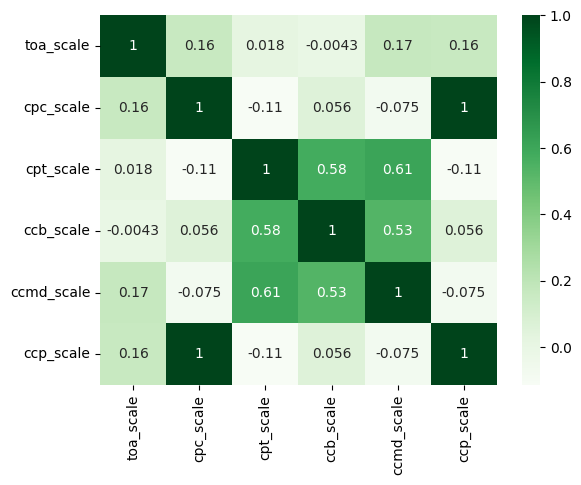

In [34]:
matrix = matrix.corr()

# plotting correlation matrix
sns.heatmap(matrix, cmap="Greens", annot=True)

CPC and CC are positively associated was supported, meaning that those who are more CPC are more likely to engage in CC. TOA is found to be weakly correlated with CPC and CC, respectively. However, CPC and CC were found to be associated with one another, as one engages in CPC, their definition of what situations, words, or expressions constitute harm expands. 
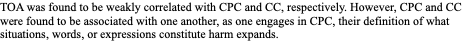
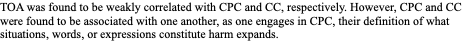
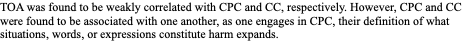
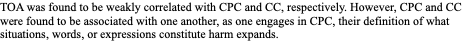

<a id="item-eight"></a>
# Independent Samples t-Test

First we are writing a function that will calculate the the T-statist and P-value for all groups on every measure. The following groups will be compared:
- Straight vs LGBTQIA
- White vs BIPOC
- Male vs female

In [35]:
def ind_smp_ttest(df, demo_col, measures_list):
    # Turn groups into a tuple
    groups_tuple = tuple(df[demo_col].cat.categories)
    
    # Loop through each measure in the measures_list
    for measure in measures_list:
        group1 = df[df[demo_col] == groups_tuple[0]][measure]
        group2 = df[df[demo_col] == groups_tuple[1]][measure]
        
        # Perform the t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        # Print the results with the measure name
        print(f'{measure} - T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}')

In [42]:
scales_list = ['toa_scale','cpc_scale','cpt_scale','ccb_scale','ccmd_scale','ccp_scale']
#Race
ind_smp_ttest(df,'Race_12',scales_list)

toa_scale - T-statistic: -0.9743, P-value: 0.3321
cpc_scale - T-statistic: 2.3502, P-value: 0.0206
cpt_scale - T-statistic: -7.1964, P-value: 0.0000
ccb_scale - T-statistic: -5.6098, P-value: 0.0000
ccmd_scale - T-statistic: -4.8009, P-value: 0.0000
ccp_scale - T-statistic: 2.3502, P-value: 0.0206


We also conducted an independent samples t-test to examine the difference in attitudes between BIPOC and white people. As shown in Table 3, those who identify as BIPOC (M = 4.58, SD = 1.29) compared to those who identify as white (M = 3.76, SD = 1.36) were more likely to demonstrate CPC, which was consistent with our hypothesis that marginalized social identities including BIPOC are more likely to engage in CPC. Effect size as measured by Cohen’s d, was d = 1.35 indicating a very strong effect. Additionally, BIPOC (M = 4.45, SD = 1.29) compared to those who identify as white (M = 3.67, SD = 1.27) were more likely to demonstrate CC-prejudice. As measured by Cohen’s d, was d = 1.27, indicating a very strong effect size as well.
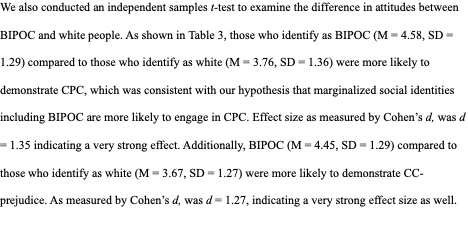
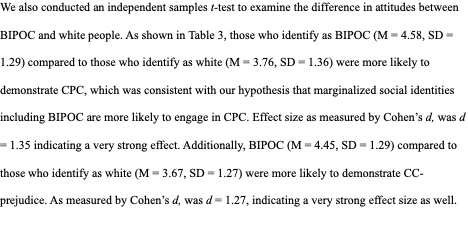
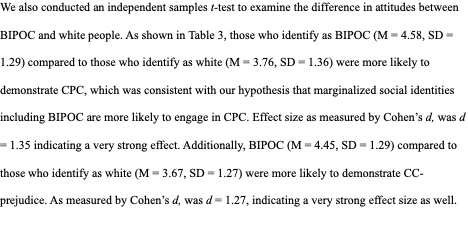
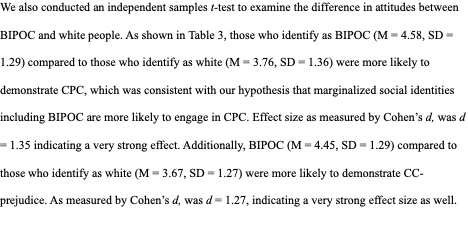

In [37]:
#Gender Identity
ind_smp_ttest(df,'Gender_Idenity_12',scales_list)

toa_scale - T-statistic: -1.0227, P-value: 0.3092
cpc_scale - T-statistic: 2.7643, P-value: 0.0069
cpt_scale - T-statistic: 4.2748, P-value: 0.0000
ccb_scale - T-statistic: 3.1523, P-value: 0.0022
ccmd_scale - T-statistic: 2.3204, P-value: 0.0226
ccp_scale - T-statistic: 2.7643, P-value: 0.0069


The next independent samples t-test we conducted examined the difference in attitudes concerning CC-Trauma between those who identify as male and female. Those who identified as male (M = 3.48, SD = 0.68) compared to those who identified as female (M = 4.11, SD = .77) differed significantly on CC-trauma. Here Cohen’s d was d = 0.82, indicating a strong effect size.  There also was a significant difference between males (M = 3.47, SD = 0.90) and females (M = 4.30, SD = 1.09) on the subscale of CC-bullying. The effect size, as measured by Cohen’s d, was d = 1.13, indicating a very strong effect.
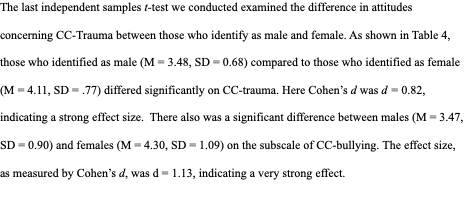
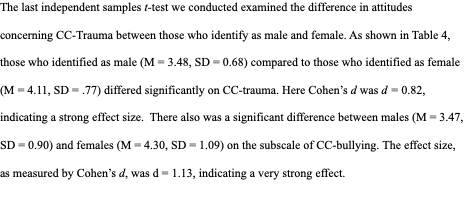
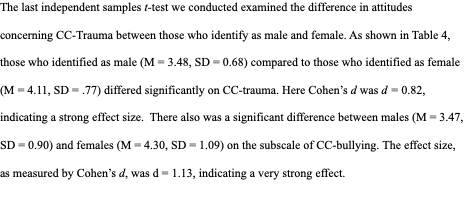
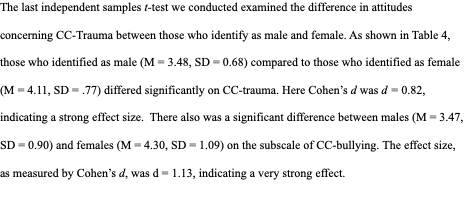

In [38]:
#Sexual Orientation
ind_smp_ttest(df,'Sexual_Orientiation_12',scales_list)

toa_scale - T-statistic: -1.2169, P-value: 0.2263
cpc_scale - T-statistic: 4.2144, P-value: 0.0001
cpt_scale - T-statistic: -2.5568, P-value: 0.0119
ccb_scale - T-statistic: -2.1722, P-value: 0.0320
ccmd_scale - T-statistic: -1.1284, P-value: 0.2616
ccp_scale - T-statistic: 4.2144, P-value: 0.0001


Here in the final independent samples t-test, we examine straight and LGBTQIA individual’s attitudes toward CPC, TOA, and CC. those who identify as LGBTQIA (M = 4.50, SD = 1.16) compared to those who identify as straight (M = 3.44, SD = 1.37)   were more likely to demonstrate CPC, which was consistent with our initial hypothesis. The effect size, as measured by Cohen’s d, was d = 1.28, indicating a very large effect.
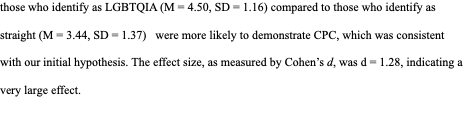
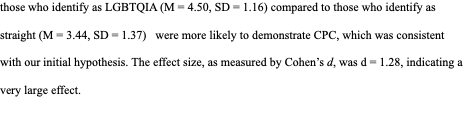
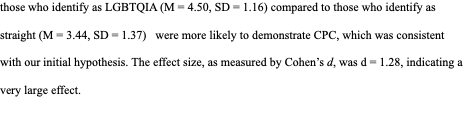
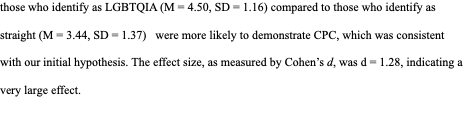

<a id="item-nine"></a>
# References
Abbot, D., Bikfalvi, A., Bleske-Rechek, A. L., Bodmer, W., Boghossian, P., Carvalho, C. M., Ciccolini, J., Coyne, J. A., Gauss, J., Gill, P. M. W., Jitomirskaya, S., Jussim, L., Krylov, A. I., Loury, G. C., Maroja, L., McWhorter, J. H., Moosavi, S., Schwerdtle, P. N., Pearl, J., … West, J. D. (2023). In Defense of Merit in Science. Journal of Controversial Ideas, 3(1), 1-. https://doi.org/10.35995/jci03010001  

Bremner, J. D. (2006). Traumatic stress: effects on the brain. Dialogues in Clinical Neuroscience, 8(4), 445–461. https://doi.org/10.31887/DCNS.2006.8.4/jbremner  

  Calabrese, S. K., Meyer, I. H., Overstreet, N. M., Haile, R., & Hansen, N. B. (2015). Exploring Discrimination and Mental Health Disparities Faced By Black Sexual Minority Women Using a Minority Stress Framework. Psychology of Women Quarterly, 39(3), 287–304. https://doi.org/10.1177/0361684314560730 

Choi, J. M., & Murphy, J. W. (1995). The Politics and Philosophy of Political Correctness. Neue Politische Literatur, 40(1), 126.  

Drieghe, L., Roets, A., De keersmaecker, J., Van Hiel, A., & Bostyn, D. (2023). Support for Freedom of Speech and Concern for Political Correctness: The Effects of Trait Emotional Intelligence and Cognitive Ability. Journal of Individual Differences, 44(2), 115–123. https://doi.org/10.1027/1614-0001/a000385  

Ford, B. R. (2017). An Empirical Test of the Effects of Political Correctness: Implications for Censorship, Self-Censorship, and Public Deliberation. eScholarship, University of California. 

Frankenberg, R. 1993. White Women, Race Matters. Minneapolis, MN: University of Minnesota Press. 

Gottfredson, L. S. (2009). Logical fallacies used to dismiss the evidence on intelligence testing. In R. Phelps (Ed.), Correcting fallacies about educational and psychological testing (pp. 11–65). Washington, DC: American Psychological Association. 

Herman, J. L., Stevens, M. J., Bird, A., Mendenhall, M., & Oddou, G. (2010). The Tolerance for Ambiguity Scale: Towards a more refined measure for international management research. International Journal of Intercultural Relations, 34(1), 58–65. https://doi.org/10.1016/j.ijintrel.2009.09.004  

Lalonde, R., Doan, L., & Patterson, L. (2000). Political correctness beliefs, threatened identities, and social attitudes. Group Processes & Intergroup Relations, 3(3), 317–336.  

Lilienfeld, S. O. (2010). Can psychology become a science? Personality and Individual Differences, 49(4), 281–288. https://doi.org/10.1016/j.paid.2010.01.024 

Loftus, E. F. (1993). The reality of repressed memories. American Psychologist, 48, 518–537.   

LOURY, G. C. (1994). Self-Censorship in Public Discourse: A Theory of “Political Correctness” and Related Phenomena. Rationality and Society, 6(4), 428–461. https://doi.org/10.1177/1043463194006004002 

McGrath, M. J., & Haslam, N. (2020). Development and validation of the Harm Concept Breadth Scale: Assessing individual differences in harm inflation. PloS One, 15(8), e0237732–e0237732. https://doi.org/10.1371/journal.pone.0237732   

Meyer, I. H. (2013). Prejudice, Social Stress, and Mental Health in Lesbian, Gay, and Bisexual Populations: Conceptual Issues and Research Evidence. Psychology of Sexual Orientation and Gender Diversity, 1(S), 3–26. https://doi.org/10.1037/2329-0382.1.S.3 

Nadal, K. L. (2018). What are microaggressions? In K. L Nadal, Microaggressions and traumatic stress: Theory, research, and clinical treatment (pp. 39–52). American Psychological Association. https://doi.org/10.1037/0000073-003  

Ong, A. D., Burrow, A. L., Fuller-Rowell, T. E., Ja, N. M., & Sue, D. W. (2013). Racial microaggressions and daily well-being among Asian Americans. Journal of Counseling Psychology, 60(2), 188–199. https://doi-org/10.1037/a0031736  

O\’Hear, Anthony., & Clark, P. (1995). Karl Popper : philosophy and problems / edited by Anthony O’Hear ; [contributors, Peter Clark and others]. Cambridge University Press. 

Rosenblum, M., Schroeder, J., & Gino, F. (2020). Tell It Like It Is: When Politically Incorrect Language Promotes Authenticity. Journal of Personality and Social Psychology, 119(1), 75–103. https://doi.org/10.1037/pspi0000206   

Satel, S., & Fox, D. M. (2001). Review of PC, M.D.: How Political Correctness Is Corrupting Medicine. The New England Journal of Medicine, 344(15), 1170–1171. https://doi.org/10.1056/NEJM200104123441515  

Scott, W., Jackson, S. E., & Hackett, R. A. (2022). Perceived discrimination, health, and well-being among adults with and without pain: A prospective study. Pain, 163(2), 258–266. https://doi-org/10.1097/j.pain.0000000000002368  

Strauts, E., & Blanton, H. (2015). That’s not funny: Instrument validation of the concern for political correctness scale. Personality and Individual Differences, 80, 32–40. https://doi.org/10.1016/j.paid.2015.02.012  

  Sue, D. W., Capodilupo, C. M., Torino, G. C., Bucceri, J. M., Holder, A. M. B., Nadal, K. L., & Esquilin, M. (2007). Racial Microaggressions in Everyday Life: Implications for Clinical Practice. The American Psychologist, 62(4), 271–286. https://doi.org/10.1037/0003-066X.62.4.271  

Talbot, M. (2007). Political correctness and freedom of speech. In M. Hellinger & A. Pauwels (Eds.), Handbook of language and communication: Diversity and change (pp. 751–764). Mouton de Gruyter. https://doi.org/10.1515/9783110198539 
